In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [33]:
#EDA
df = pd.read_csv("D:\Machinelearning\data\insurance.csv")
df 


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


EDA

In [34]:
df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [35]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [36]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [37]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

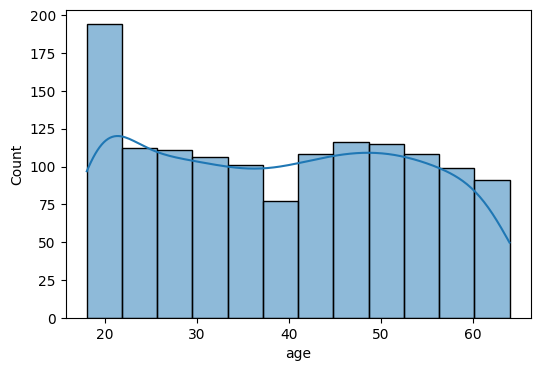

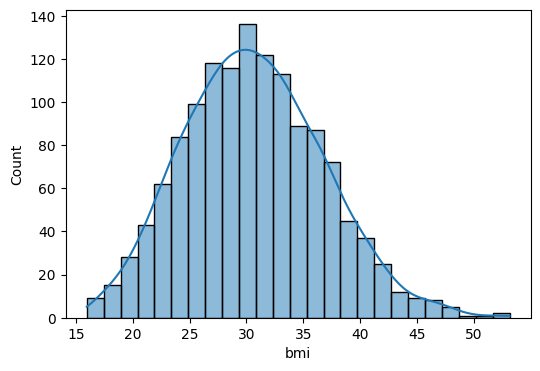

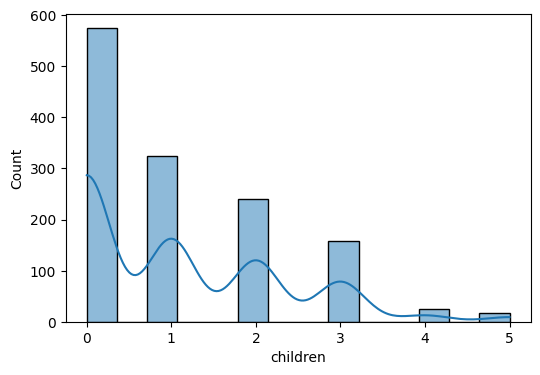

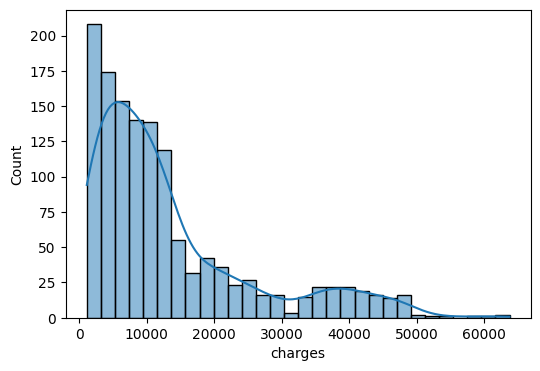

In [38]:
numeric_columns = ['age','bmi','children','charges']
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde = True)

<Axes: xlabel='children', ylabel='count'>

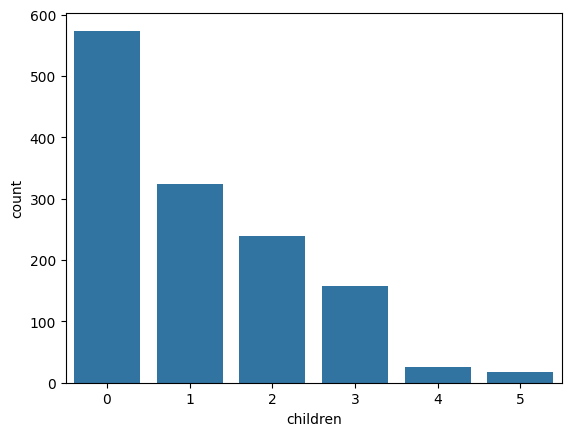

In [39]:
sns.countplot(x= df['children'])

<Axes: xlabel='smoker', ylabel='count'>

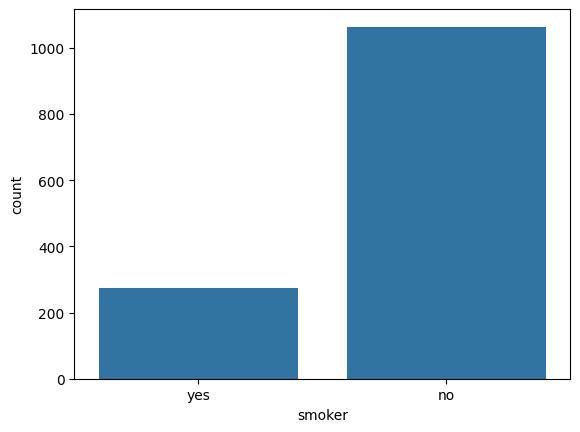

In [40]:
sns.countplot(x = df['smoker'])

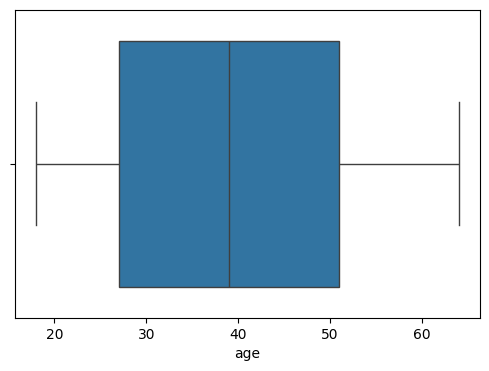

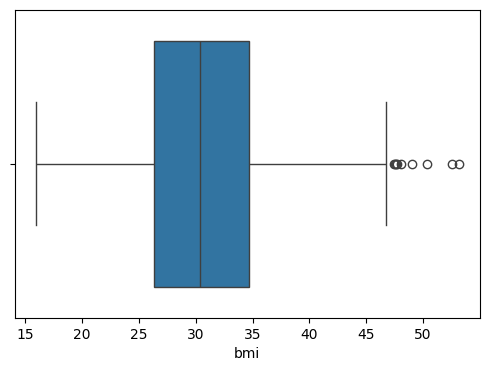

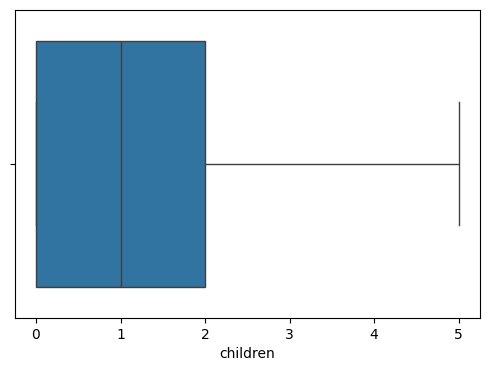

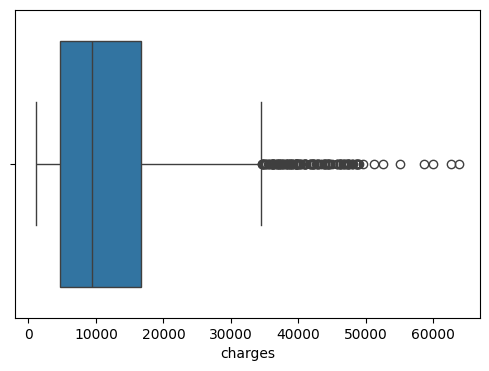

In [41]:
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x = df[col])

<Axes: >

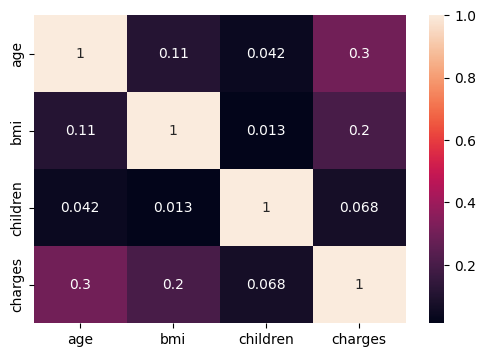

In [42]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True),annot=True)

Data Cleaning and preprocessing

In [43]:
df_cleaned = df.copy()
df_cleaned.drop_duplicates(inplace = True)
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [44]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

Label encoding

In [45]:

df_cleaned['sex']= df_cleaned["sex"].map({"male":0,"female":1})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


Label encoding

In [46]:
df_cleaned["smoker"] = df_cleaned["smoker"].map({"yes":1,"no":0})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


One hot encoding

In [47]:
df_cleaned = pd.get_dummies(df_cleaned,columns= ['region'],drop_first= True)
df_cleaned.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [48]:
df_cleaned = df_cleaned.astype(int)
df_cleaned.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


Feature engineering

In [49]:
df_cleaned["bmi_category"] = pd.cut(df_cleaned["bmi"],
                    bins =[0,18.5,24.9,29.9,float('inf')],
                    labels = ['Underweight','Normal','Overweight','Obese'])
df_cleaned

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,Obese
1334,18,1,31,0,0,2205,0,0,0,Obese
1335,18,1,36,0,0,1629,0,1,0,Obese
1336,21,1,25,0,0,2007,0,0,1,Overweight


One hot encoding

In [50]:
df_cleaned = pd.get_dummies(df_cleaned,columns=['bmi_category'],drop_first = True)
df_cleaned = df_cleaned.astype(int)
df_cleaned.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
cols = ['age','bmi','children']
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])
print(df_cleaned.head())
#cols = ['age', 'bmi', 'children']

# Step 1: Get variance from the DataFrame (not the list)
# variance = df_cleaned[cols].var(ddof=0)

# print("Variance for each column:\n", variance)


        age  sex       bmi  children  smoker  charges  region_northwest  \
0 -1.440418    1 -0.517949 -0.909234       1    16884                 0   
1 -1.511647    0  0.462463 -0.079442       0     1725                 0   
2 -0.799350    0  0.462463  1.580143       0     4449                 0   
3 -0.443201    0 -1.334960 -0.909234       0    21984                 1   
4 -0.514431    0 -0.354547 -0.909234       0     3866                 1   

   region_southeast  region_southwest  bmi_category_Normal  \
0                 0                 1                    0   
1                 1                 0                    0   
2                 1                 0                    0   
3                 0                 0                    1   
4                 0                 0                    0   

   bmi_category_Overweight  bmi_category_Obese  
0                        1                   0  
1                        0                   1  
2                        0   

In [52]:
from scipy.stats import pearsonr
# pearsonr correlation calculation
#list of features to check against target
selected_features = ['age',	'sex',	'bmi',	'children',	'smoker',	'region_northwest',	'region_southeast',
                     'region_southwest',	'bmi_category_Normal',	'bmi_category_Overweight',	'bmi_category_Obese'
    
]
correlations = {
    feature:pearsonr(df_cleaned[feature],df_cleaned["charges"])[0]
    for feature in selected_features
    
}
correlation_df = pd.DataFrame(list(correlations.items()),columns = ['feature','Pearson correlation'])
correlation_df.sort_values(by = "Pearson correlation",ascending =False)
#to be continue


,feature,Pearson correlation
4,smoker,0.787234
0,age,0.298309
10,bmi_category_Obese,0.200348
2,bmi,0.196236
6,region_southeast,0.073577
3,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
1,sex,-0.058046
8,bmi_category_Normal,-0.104042


In [53]:
cat_features = [
    'sex', 'smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

In [54]:
from scipy.stats import chi2_contingency
import pandas as pd

# Define significance level
alpha = 0.05

# Bin the target variable
df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)

# Run Chi-Square test
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

# Convert to DataFrame
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df


,chi2_statistic,p_value,Decision
smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
sex,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obese,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [55]:
final_df = df_cleaned[['age', 'bmi', 'children', 'smoker', 'charges','region_southeast','bmi_category_Obese','region_northwest']]

In [56]:
from sklearn.model_selection import train_test_split
x = final_df.drop('charges',axis=1)
y = final_df["charges"]
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.33,random_state=42)


Linear regression

In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
y_Pred = model.predict(X_test)

In [63]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_Pred)
print(r2)
n =X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-((1-r2)*(n-1))/(n-p-1)
adjusted_r2

0.7736670448215113


0.7700165132863743